In [155]:
#imports modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [156]:
#imports csv file
train_df = pd.read_csv(r'D:\Coding\projects\Palak_Paneer\train.csv')
print(train_df.shape)
train_df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [157]:
#calculates fill rate for columns
fill_rate = {}
for i in train_df:
    null_count = (train_df[i].isna().sum())
    frate = 100-(null_count/891)*100
    fill_rate[i]=frate

#converts fill rate from dictionary to a dataframe
fillrate_df = pd.DataFrame((fill_rate.items()), columns = ['column_name', 'fill_rate'])
fillrate_df

,column_name,fill_rate
0,PassengerId,100.000000
1,Survived,100.000000
2,Pclass,100.000000
3,Name,100.000000
4,Sex,100.000000
5,Age,80.134680
6,SibSp,100.000000
7,Parch,100.000000
8,Ticket,100.000000
9,Fare,100.000000


In [158]:
#descriptive stats for age column
train_df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [159]:
#calculates average age of men and women in diff pclass
groupedvalues = train_df[['Sex','Pclass','Age']].groupby(['Sex','Pclass']).mean().reset_index()
groupedvalues

,Sex,Pclass,Age
0,female,1,34.611765
1,female,2,28.722973
2,female,3,21.750000
3,male,1,41.281386
4,male,2,30.740707
5,male,3,26.507589


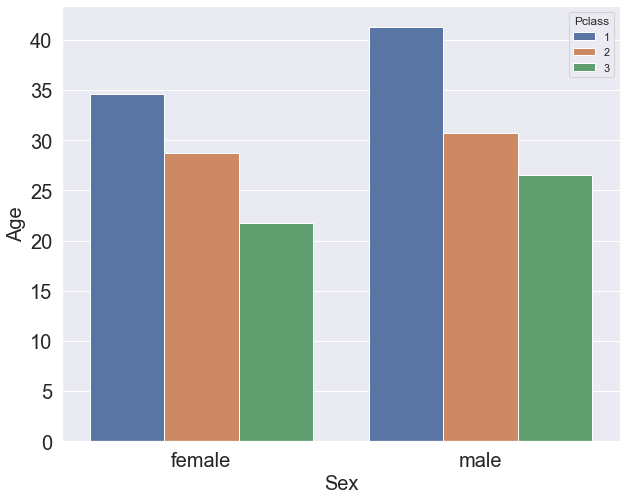

In [160]:
#plots the age of males and females by pclass
plt.figure(figsize = (10,8))
plt.plot(1,1,1)

sns.set_theme()
g = sns.barplot(data=groupedvalues, x = 'Sex', y = 'Age', hue='Pclass', ci = None, estimator = np.mean)
g.set_xlabel("Sex",fontsize=20)
g.set_ylabel("Age",fontsize=20)
g.tick_params(labelsize = 20)
#for index, row in groupedvalues.iterrows():
    #g.text(row.name, row.Age,round(row.Age,2), color = 'black', ha="right")

plt.show()

In [178]:
#calculates survival rates for males and females in different pclasses
grouped_survival = train_df[['Sex','Pclass','Survived']].groupby(['Sex','Pclass']).agg(['count','sum']).reset_index()
grouped_survival['survival_rate'] = (grouped_survival['Survived']['sum']/grouped_survival['Survived']['count'])*100
grouped_survival

Sex Pclass Survived     survival_rate
                    count sum              
0  female      1       94  91     96.808511
1  female      2       76  70     92.105263
2  female      3      144  72     50.000000
3    male      1      122  45     36.885246
4    male      2      108  17     15.740741
5    male      3      347  47     13.544669

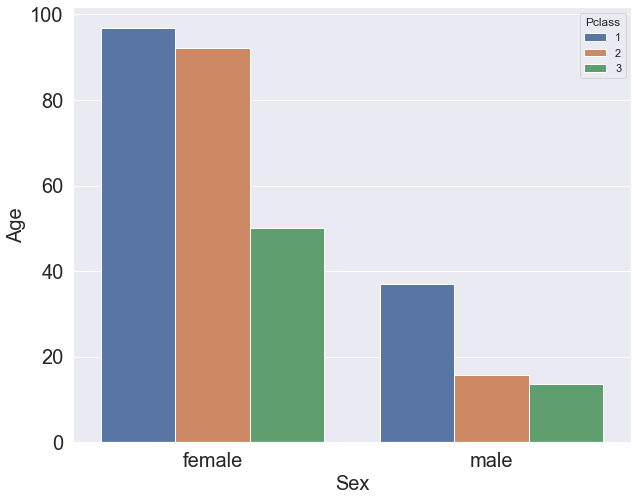

In [184]:
#plots survival rate by gender and pclass
plt.figure(figsize = (10,8))
sns.set_theme()
p = sns.barplot(data=grouped_survival, x = 'Sex', y = 'survival_rate', hue='Pclass', ci = None, estimator = np.mean)
p.set_xlabel("Sex",fontsize=20)
p.set_ylabel("Age",fontsize=20)
p.tick_params(labelsize = 20)

plt.show()

In [192]:
#creates a separate df for kids (below 15 years) to estimate survival rate by class and gender
bache_df = train_df[train_df['Age']<=15].reset_index()
bache_df.drop(columns = ['index'], inplace = True)
print(bache_df.shape)
bache_df.head()

(83, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
1,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
2,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
3,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
4,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


In [198]:
#QC
bache_df[bache_df['Age']>15].head()
#pass

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [193]:
#estimates survival rate of kids by class and gender
grouped_kids = bache_df[['Sex','Pclass','Survived']].groupby(['Sex','Pclass']).agg(['count','sum']).reset_index()
grouped_kids['survival_rate'] = (grouped_kids['Survived']['sum']/grouped_kids['Survived']['count'])*100
grouped_kids

Sex Pclass Survived     survival_rate
                    count sum              
0  female      1        3   2     66.666667
1  female      2       10  10    100.000000
2  female      3       30  16     53.333333
3    male      1        3   3    100.000000
4    male      2        9   9    100.000000
5    male      3       28   9     32.142857